In [274]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=";")

data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [275]:
# Checking for duplicates

data.duplicated().any().any()

np.True_

In [276]:
# Eliminating duplicates

data = data.drop_duplicates()

In [277]:
# Checking for nulls

data.isnull().any().any()

np.False_

In [278]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [279]:
data['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [280]:
data.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [281]:
data['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [282]:
# Converting y to binary to use in correlation analysis

data['y'] = data['y'].apply(lambda row: 0 if row == 'no' else 1)

data['y'].value_counts()


y
0    36537
1     4639
Name: count, dtype: int64

In [283]:
# Getting the column names for numerical and categorical data

num_var = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_var = data.select_dtypes(include=['object']).columns.tolist()

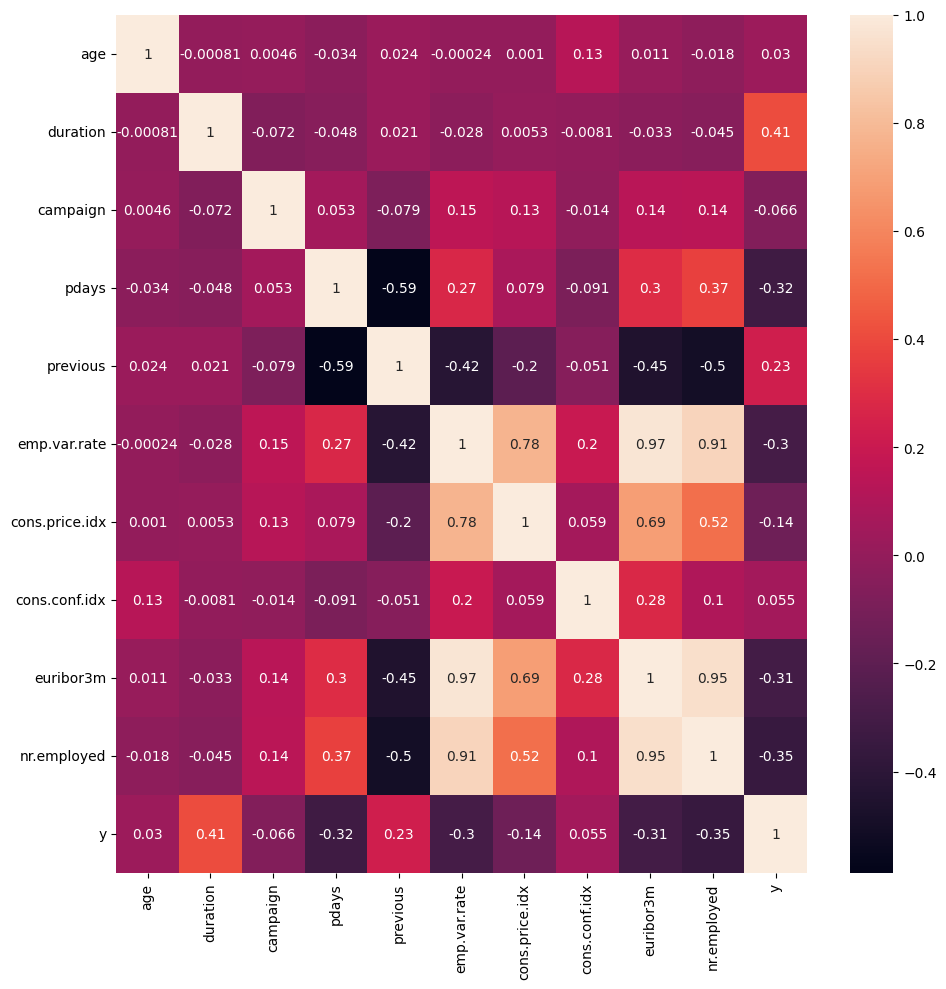

In [284]:
# Heatmap of numerical variables

fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(data[num_var].corr(), annot=True)
plt.tight_layout()
plt.show()

In [285]:
# Dropping the columns with low correlation to y

col_to_drop = ['age', 'campaign', 'cons.price.idx', 'cons.conf.idx']

for col in col_to_drop:
    num_var.remove(col)

In [286]:
data[num_var].head()

,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,y
0,261,999,0,1.1,4.857,5191.0,0
1,149,999,0,1.1,4.857,5191.0,0
2,226,999,0,1.1,4.857,5191.0,0
3,151,999,0,1.1,4.857,5191.0,0
4,307,999,0,1.1,4.857,5191.0,0


In [287]:
data['emp.var.rate'].nunique()

10

In [288]:
data['previous'].value_counts()

previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [289]:
data['pdays'].value_counts()

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

The high frequency of 999 days raises questions about what this value for 'pdays' means. The high occurence of 0 in the 'previous' column, meaning the customer was not contacted during the previous campaign, make this 999 more unclear. I experimented with removing it from the regression, but the removal lowered the accuracy of the model.

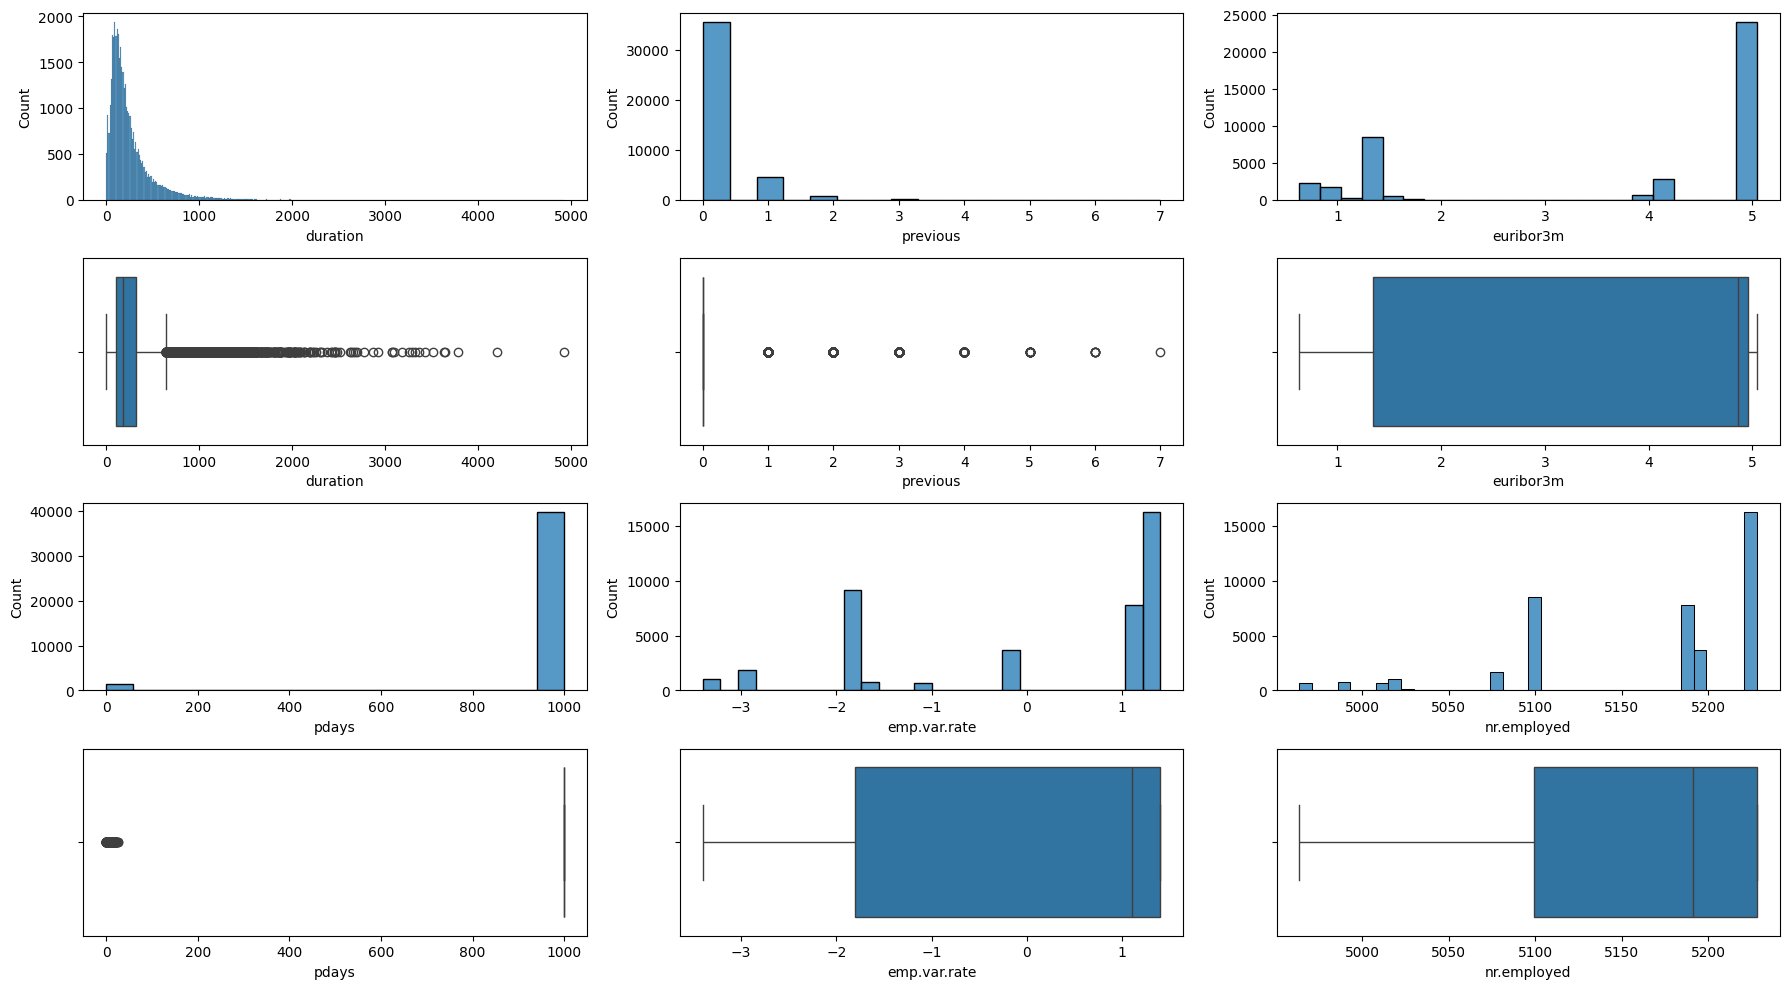

In [290]:
# Histogram and box plot of numerical variables

fig, axis = plt.subplots(4, 3, figsize=(18,10))

sns.histplot(ax=axis[0,0], data=data, x='duration')
sns.boxplot(ax=axis[1,0], data=data, x='duration')

sns.histplot(ax=axis[2,0], data=data, x='pdays')
sns.boxplot(ax=axis[3,0], data=data, x='pdays')

sns.histplot(ax=axis[0,1], data=data, x='previous')
sns.boxplot(ax=axis[1,1], data=data, x='previous')

sns.histplot(ax=axis[2,1], data=data, x='emp.var.rate')
sns.boxplot(ax=axis[3,1], data=data, x='emp.var.rate')

sns.histplot(ax=axis[0,2], data=data, x='euribor3m')
sns.boxplot(ax=axis[1,2], data=data, x='euribor3m')

sns.histplot(ax=axis[2,2], data=data, x='nr.employed')
sns.boxplot(ax=axis[3,2], data=data, x='nr.employed')

plt.tight_layout()
plt.show()

In [291]:
# Analysis of categorical variables

cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

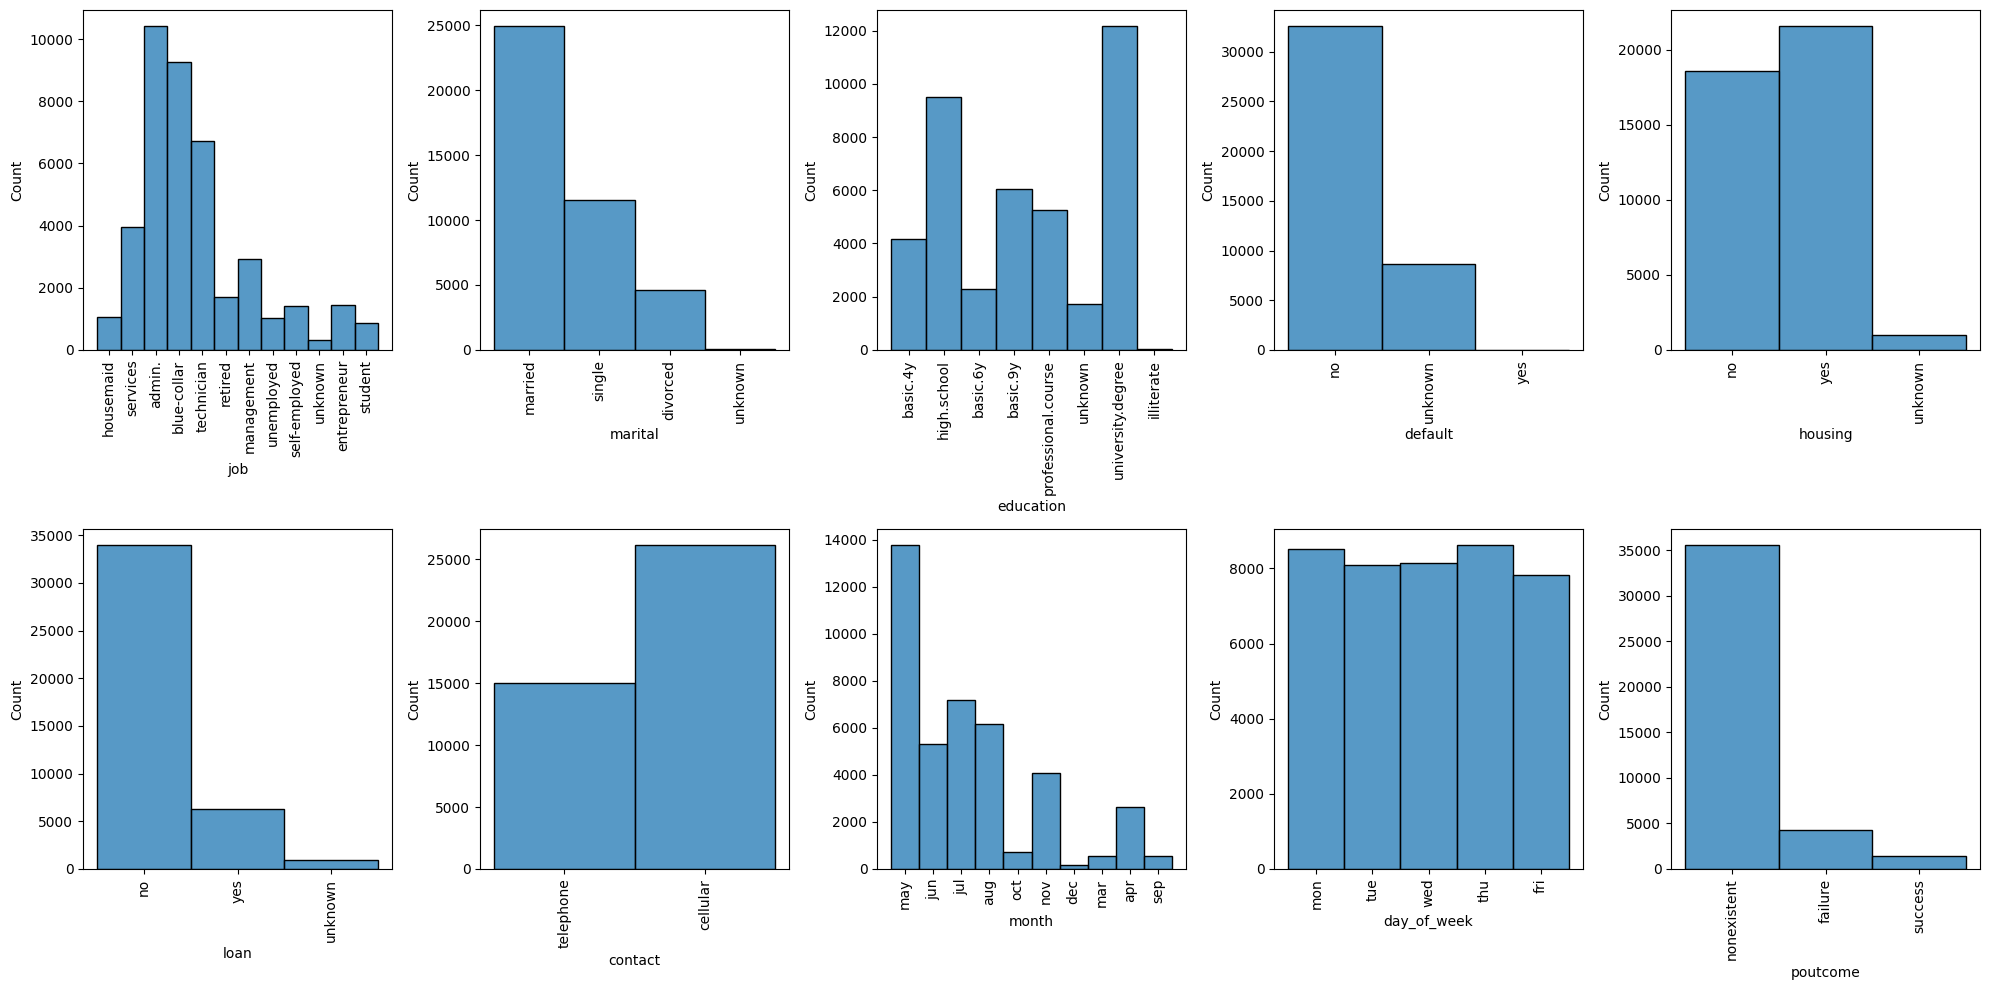

In [292]:
# Histograms of categorical variables

fig, axis = plt.subplots(2, 5, figsize=(20,10))

sns.histplot(ax = axis[0,0], data=data, x='job')
sns.histplot(ax = axis[0,1], data=data, x='marital')
sns.histplot(ax = axis[0,2], data=data, x='education')
sns.histplot(ax = axis[0,3], data=data, x='default')
sns.histplot(ax = axis[0,4], data=data, x='housing')
sns.histplot(ax = axis[1,0], data=data, x='loan')
sns.histplot(ax = axis[1,1], data=data, x='contact')
sns.histplot(ax = axis[1,2], data=data, x='month')
sns.histplot(ax = axis[1,3], data=data, x='day_of_week')
sns.histplot(ax = axis[1,4], data=data, x='poutcome')

for ax in axis.ravel():
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

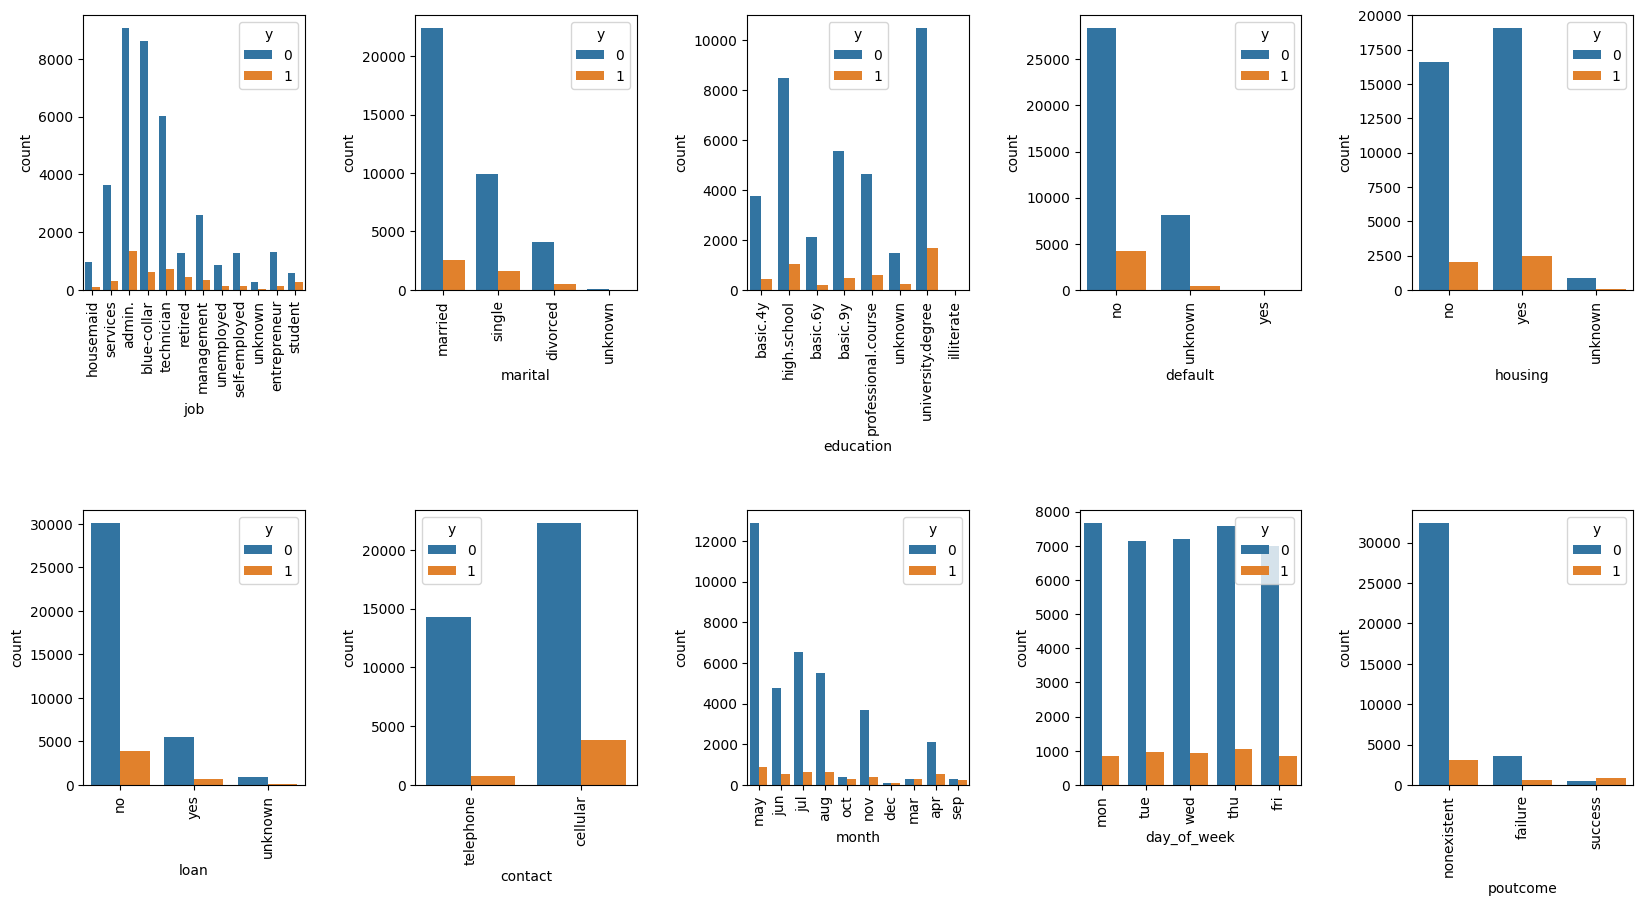

In [293]:
# Countplots of categorical variables measured against y

fig, axis = plt.subplots(2, 5, figsize=(20,10))

sns.countplot(ax = axis[0,0],data=data, x='job', hue='y')
sns.countplot(ax = axis[0,1],data=data, x='marital', hue='y')
sns.countplot(ax = axis[0,2],data=data, x='education', hue='y')
sns.countplot(ax = axis[0,3],data=data, x='default', hue='y')
sns.countplot(ax = axis[0,4],data=data, x='housing', hue='y')
sns.countplot(ax = axis[1,0],data=data, x='loan', hue='y')
sns.countplot(ax = axis[1,1],data=data, x='contact', hue='y')
sns.countplot(ax = axis[1,2],data=data, x='month', hue='y')
sns.countplot(ax = axis[1,3],data=data, x='day_of_week', hue='y')
sns.countplot(ax = axis[1,4],data=data, x='poutcome', hue='y')

plt.subplots_adjust(hspace=0.8, wspace=0.5)

for ax in axis.ravel():
    ax.tick_params(axis='x', rotation=90)

plt.show()

In [294]:
data['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

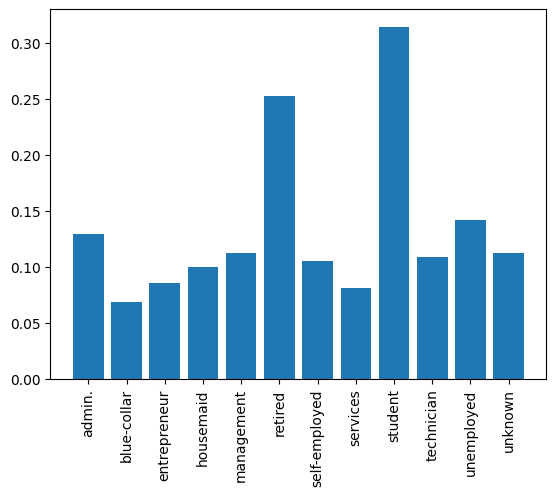

In [295]:
# Bar graph for average y grouped by job
# Although y is binary, this may give a sense of tendency to have yes for y

mean_by_job = data.groupby('job')['y'].mean().reset_index()

plt.bar(mean_by_job['job'], mean_by_job['y'])
plt.xticks(rotation=90)
plt.show()

In [296]:
# Closer look for correlation between contact and y

data.groupby('contact')['y'].value_counts(normalize=True)


contact    y
cellular   0    0.852611
           1    0.147389
telephone  0    0.947676
           1    0.052324
Name: proportion, dtype: float64

People with cellular for contact have triple the rate for y

In [297]:
# Getting dummy variables for categorical data

cat_data = pd.get_dummies(data[cat_var])

cat_var = cat_data.columns.tolist()

cat_var

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [298]:
# Recreating the dataframe with the numerical and dummy columns 

data = pd.concat([data[num_var], cat_data], axis=1)


In [299]:
# Creating lists for features and target

num_var.remove('y') # Removing target from num_var

features = num_var + cat_var

target = 'y'

In [300]:
# Separating the dataset

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [301]:
# Separating the numerical parts of X for scaling

X_train_num = X_train[num_var]
X_test_num = X_test[num_var]

In [302]:
# Scaling the numerical data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_num.index, columns=X_train_num.columns)

X_test_scaled = scaler.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test_num.index, columns=X_test_num.columns)


In [303]:
# Reassembling the fully processed X sets

X_train_p = pd.concat([X_train_scaled, X_train[cat_var]], axis=1)
X_test_p = pd.concat([X_test_scaled, X_test[cat_var]], axis=1)

In [304]:
# Initializing and training of the model

model = LogisticRegression()
model.fit(X_train_p, y_train)

LogisticRegression()

In [305]:
# Evaluating model

y_pred = model.predict(X_test_p)

accuracy_score(y_test, y_pred)

0.9040796503156873